<a href="https://colab.research.google.com/github/Satya-Mohan/evengbatch/blob/master/Artificial%20intelligence%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [310]:
# 1. lmporting Libraries

In [486]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split 
from keras.models import Sequential
from keras.layers import Dense 
import seaborn as sns
import matplotlib.pyplot as plt


In [487]:
# 2. Loading Dataset


In [488]:
diabetes = pd.read_csv('/content/diabetes.csv')


In [489]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [490]:
# 3. Inspecting Data


In [491]:
diabetes.shape

(768, 9)

In [492]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [493]:
diabetes.describe([0.05,0.25,0.50,0.75,0.90,0.95,0.99]).T

,count,mean,std,min,5%,25%,50%,75%,90%,95%,99%,max
Pregnancies,768.0,3.845052,3.369578,0.000,0.00000,1.00000,3.0000,6.00000,9.0000,10.00000,13.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,79.00000,99.00000,117.0000,140.25000,167.0000,181.00000,196.00000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,38.70000,62.00000,72.0000,80.00000,88.0000,90.00000,106.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,0.00000,23.0000,32.00000,40.0000,44.00000,51.33000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,0.00000,30.5000,127.25000,210.0000,293.00000,519.90000,846.00
BMI,768.0,31.992578,7.884160,0.000,21.80000,27.30000,32.0000,36.60000,41.5000,44.39500,50.75900,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.14035,0.24375,0.3725,0.62625,0.8786,1.13285,1.69833,2.42
Age,768.0,33.240885,11.760232,21.000,21.00000,24.00000,29.0000,41.00000,51.0000,58.00000,67.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.00000,0.0000,1.00000,1.0000,1.00000,1.00000,1.00


In [494]:
# Target variable 
diabetes.Outcome.unique()


array([1, 0])

In [495]:
diabetes.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [496]:
# 4. Cleaning the Data

In [497]:
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [498]:
# 5. Model Training

In [499]:
X = diabetes.drop("Outcome",axis=1)
y = diabetes["Outcome"]


In [500]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.12, random_state=90) 
print(X_train.shape)
print(X_test.shape) 
print(y_train.shape) 
print(y_test.shape)


(675, 8)
(93, 8)
(675,)
(93,)


In [501]:
model = Sequential()

In [502]:
model.add(Dense(4, input_dim=X_train.shape[1], activation = 'relu'))

In [503]:

model.add(Dense(4,activation = 'relu')) 
model.add(Dense(1, activation = 'sigmoid')) 

In [527]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [546]:
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test)) 

Epoch 1/5
22/22 [==============================] - 0s 6ms/step - loss: 0.0000e+00 - accuracy: 0.6474 - val_loss: 0.0000e+00 - val_accuracy: 0.6882
Epoch 2/5
22/22 [==============================] - 0s 7ms/step - loss: 0.0000e+00 - accuracy: 0.6474 - val_loss: 0.0000e+00 - val_accuracy: 0.6882
Epoch 3/5
22/22 [==============================] - 0s 9ms/step - loss: 0.0000e+00 - accuracy: 0.6474 - val_loss: 0.0000e+00 - val_accuracy: 0.6882
Epoch 4/5
22/22 [==============================] - 0s 6ms/step - loss: 0.0000e+00 - accuracy: 0.6474 - val_loss: 0.0000e+00 - val_accuracy: 0.6882
Epoch 5/5
22/22 [==============================] - 0s 7ms/step - loss: 0.0000e+00 - accuracy: 0.6474 - val_loss: 0.0000e+00 - val_accuracy: 0.6882


In [547]:
h = model.evaluate(X_test, y_test)
h

3/3 [==============================] - 0s 6ms/step - loss: 0.0000e+00 - accuracy: 0.6882


[0.0, 0.6881720423698425]

In [548]:
# 7.Visualize the accuracy and loss curves


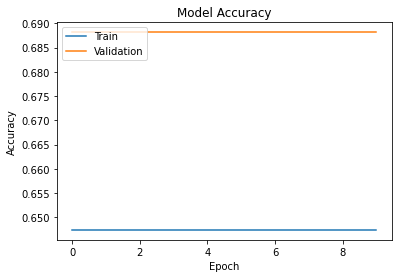

In [542]:
plt.plot(history.history['accuracy']) 
plt.plot(history.history['val_accuracy']) 
plt.title('Model Accuracy') 
plt.ylabel('Accuracy') 
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left') 
plt.show()

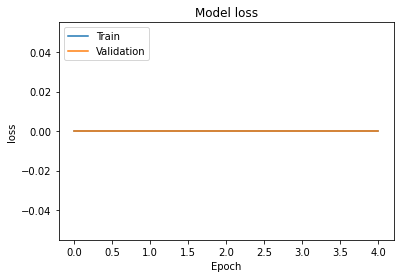

In [509]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left') 
plt.show()
